In [23]:
import numpy as np
import pylab as pl


class Perceptron:
    def __init__(self, learning_rate=0.1, num_iterations=1000):
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations

    def fit(self, X, y):
        # Initialize weights to small random values
        self.weights = np.random.rand(X.shape[1])

        # Loop through the number of iterations
        for i in range(self.num_iterations):
            # Loop through each example in the training set
            for x, label in zip(X, y):
                # Make a prediction using the current weights
                prediction = self.predict(x)

                # Update the weights if the prediction was incorrect
                if prediction != label:
                    error = label - prediction
                    self.weights += self.learning_rate * error * x

    def predict(self, x):
        # Calculate the dot product of the input features and the weights
        dot_product = np.dot(x, self.weights)

        # Return 1 if the dot product is positive, otherwise return 0
        return 1 if dot_product >= 0 else 0

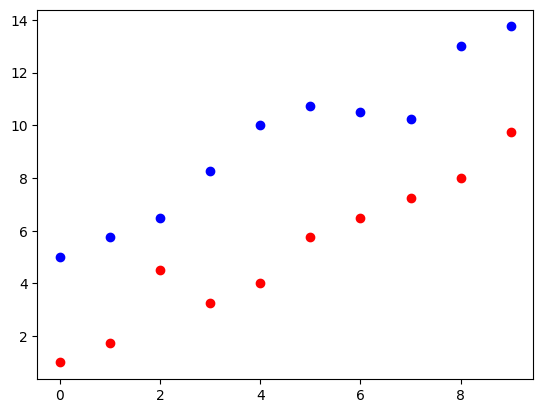

In [24]:
from random import randint
import matplotlib.pyplot as plt

# Assume we have a two-dimensional dataset with two classes:
X_help_1 = [[x, 4 + .75 * x + 2 + randint(-1, 1)] for x in range(10)]
X_help_2 = [[x, 4+ .75 * x - 2 + randint(-1, 1)] for x in range(10)]
X = np.array(X_help_1 + X_help_2)
# X = np.array([[1, 2], [2, 3], [3, 4], [4, 5]])

Y_help_1 = [1] * 10
Y_help_2 = [0] * 10
y = np.array(Y_help_1 + Y_help_2)

# Loop through the examples and plot them
for x, label in zip(X, y):
    if label == 0:
        plt.scatter(x[0], x[1], color='r')
    else:
        plt.scatter(x[0], x[1], color='b')

plt.show()

In [25]:

# Create a perceptron and fit it to the training data
p = Perceptron()
p.fit(X, y)
point = [5,6]
# Make a prediction for a new point
point = np.array(point)
prediction = p.predict(point)
print(prediction)  # Outputs 1


0


In [32]:
from random import uniform

test_points = [[uniform(0,14), uniform(0,14)] for _ in range(30)]
predictions = [p.predict(point) for point in test_points]

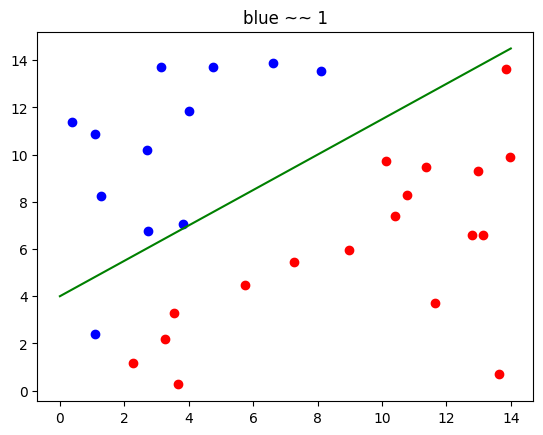

In [34]:
for x, label in zip(test_points, predictions):
    if label == 0:
        plt.scatter(x[0], x[1], color='r')
    else:
        plt.scatter(x[0], x[1], color='b')
# plt.scatter(point[0], point[1], color='y')
plt.title("blue ~~ 1")
x = np.linspace(0,14)
y = 4+ .75*x
plt.plot(x, y, color="g")

In [27]:
p.weights.shape


(2,)